# Experimenting with MNIST Fashion

The aim of this notebook is to train an ANN model and a CNN model on the MNIST Fashion dataset to classify a given clothing image of 28x28 using TensorFlow. Before running this notebook, you need to select the interpreter to the tf-gpu environment that you created following the repository's README.

## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

## Data Acquisition

The following cell downloads the Fashion-MNIST dataset and extracts the data.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Let's define the class names in the same order that's defined in the dataset's [source](https://github.com/zalandoresearch/fashion-mnist).

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

It is important to know the distribution (or rather the balance) of the data among the classes because it affects the accuracy of any predictive model. If a particular class has many examples of data than the others, the model may become biased towards that class.

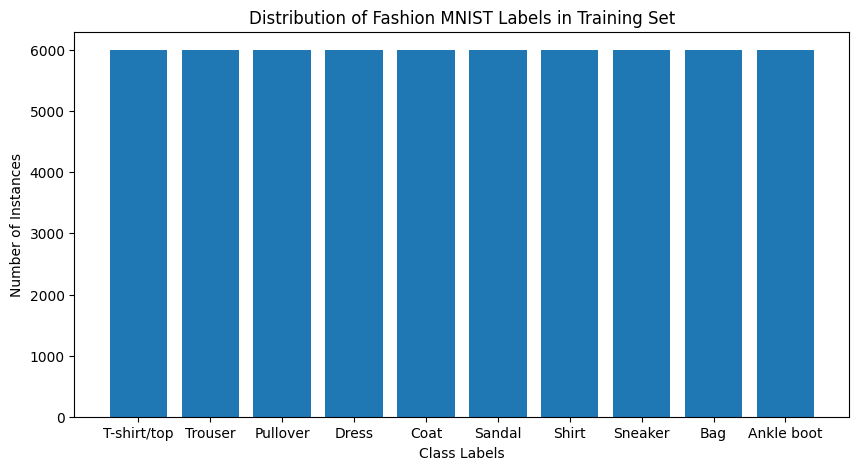

In [4]:
class_counts = np.bincount(y_train)
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.title('Distribution of Fashion MNIST Labels in Training Set')
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.show()

By observing the above plot, we can see that the data is evenly distributed between the 10 different classes.

## Data Preprocessing

In [5]:
print(f'Shape of X_train: {x_train.shape}')
print(f'Shape of X_test: {x_test.shape}')
print(f'Min and Max values of the train data: Min-> {x_train.min()}, Max-> {x_train.max()} | Data Type-> {x_train.dtype}')

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Min and Max values of the train data: Min-> 0, Max-> 255 | Data Type-> uint8


Since the goal is to train some neural networks on the dataset, it's better to normalize the data between 0 and 1 since the original data is between 0 and 255. Also we need to reshape the data since our neural networks expect a flattened set of pixels instead of a 2D pixel grid.

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

print(f'Shape of X_train: {x_train.shape}')
print(f'Shape of X_test: {x_test.shape}')
print(f'Min and Max values of the train data: Min-> {x_train.min()}, Max-> {x_train.max()} | Data Type-> {x_train.dtype}')

Shape of X_train: (60000, 784)
Shape of X_test: (10000, 784)
Min and Max values of the train data: Min-> 0.0, Max-> 1.0 | Data Type-> float64


Let's take a look at the first 9 rows of the training data.

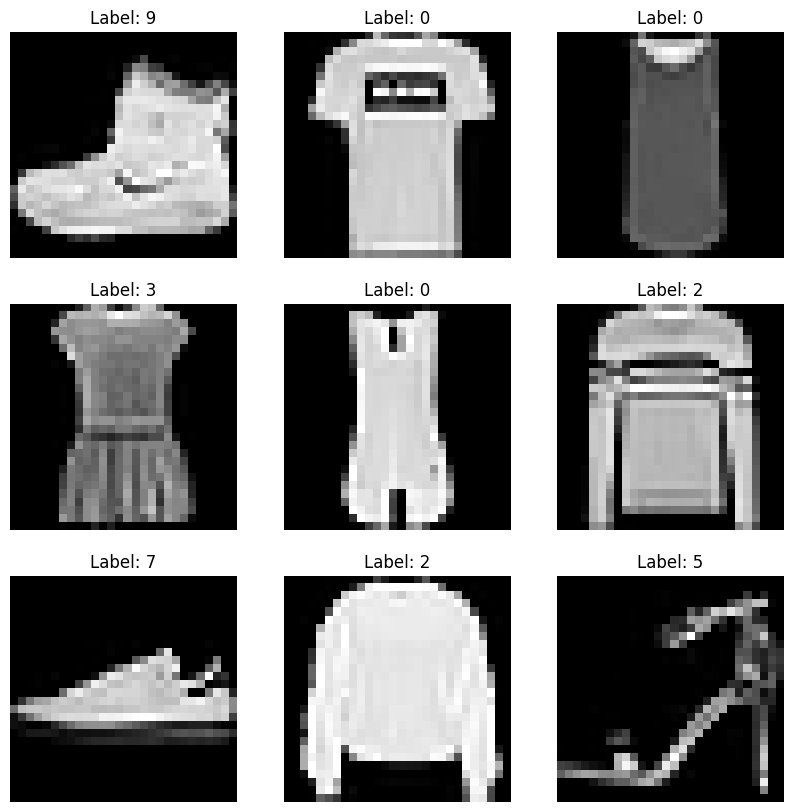

In [7]:
train_preview = x_train[:9].reshape(9, 28, 28)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_preview[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')

Validating the machine learning model outputs are important to ensure its accuracy. Therefore, let's split the test dataset to 4:1 ratio for validation and test data.

In [8]:
(x_val, x_test, y_val, y_test) = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Training the ANN

### Building the Model

Let's start by creating a basic deep neural network with 4 layers where the last layer will be a dense layer with softmax activation by treating the individual pixels as different features. There will be 2 hidden layers with 256 neurons and 128 neurons respectively. The two hidden layers are intended to capture different high and low level features of the image and pass it to the next layer by further condesing the recognized features.

In [13]:
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


### Training the Model

Now, let's compile the model with the Adam optimizer and the cross entropy loss function. We will also use the accuracy metric for evaluating the model. Then we will fit the model to the training data.

In [14]:
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = nn_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4763 - accuracy: 0.8269 - val_loss: 0.3807 - val_accuracy: 0.8596
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3616 - accuracy: 0.8669 - val_loss: 0.3411 - val_accuracy: 0.8736
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3249 - accuracy: 0.8798 - val_loss: 0.2901 - val_accuracy: 0.8911
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3033 - accuracy: 0.8870 - val_loss: 0.2745 - val_accuracy: 0.8972
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2838 - accuracy: 0.8940 - val_loss: 0.2720 - val_accuracy: 0.8984
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2682 - accuracy: 0.8993 - val_loss: 0.2364 - val_accuracy: 0.9131
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2572 - accuracy: 0.9026 - val_loss: 0.2294 - val_ac

### Evaluating the Model

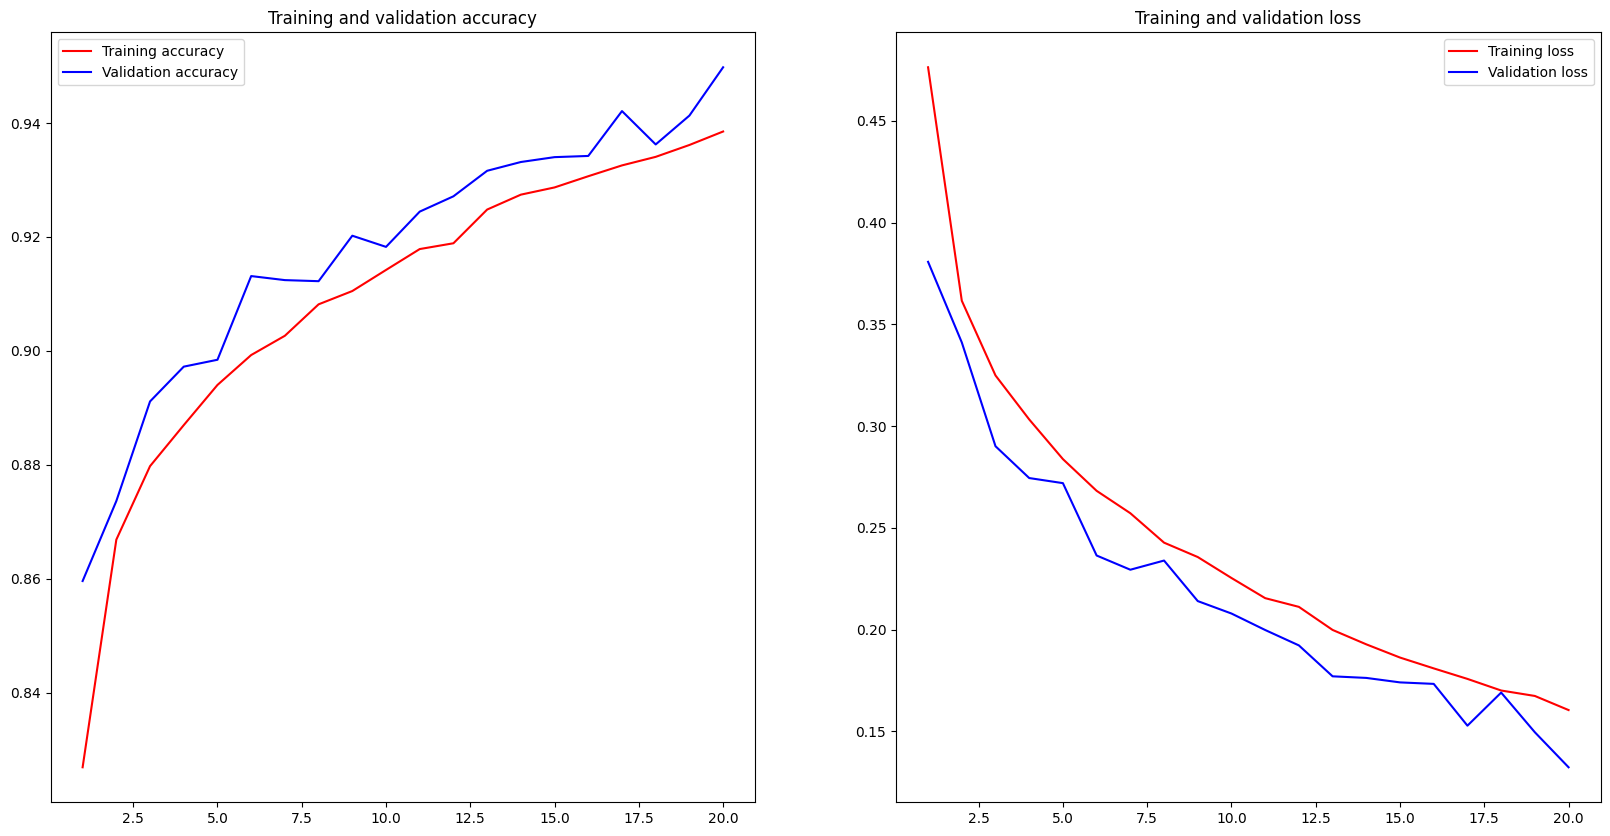

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()
ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

Now let's take a look at how well the model has recognized the classes.

Text(0.5, 1.0, 'Training accuracy per class')

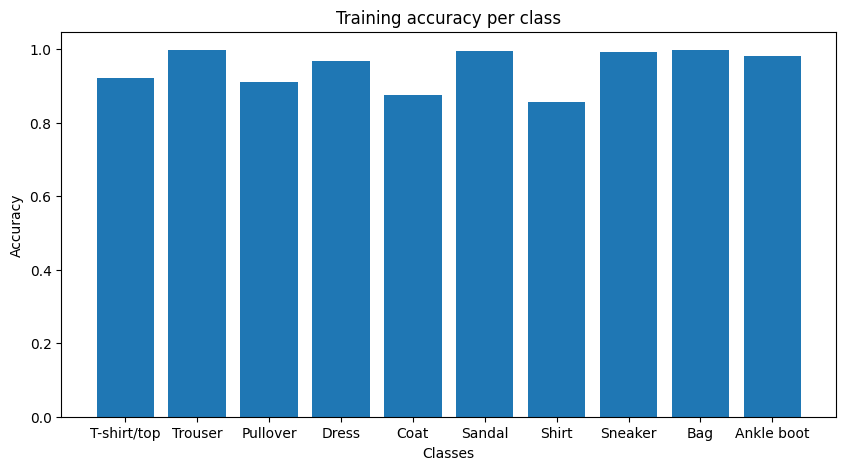

In [16]:
train_predictions = nn_model.predict(x_train)
train_predictions = np.argmax(train_predictions, axis=1)
class_accuracy = [np.mean(train_predictions[y_train == i] == i) for i in range(10)]
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy)
plt.xticks(range(10), class_names)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Training accuracy per class')

By observing the above curve you will see that the ANN model that we trained struggles to recognize the 'Shirt' class. Also, the learning curves show that the model 

### Testing the Model on Unseen Data

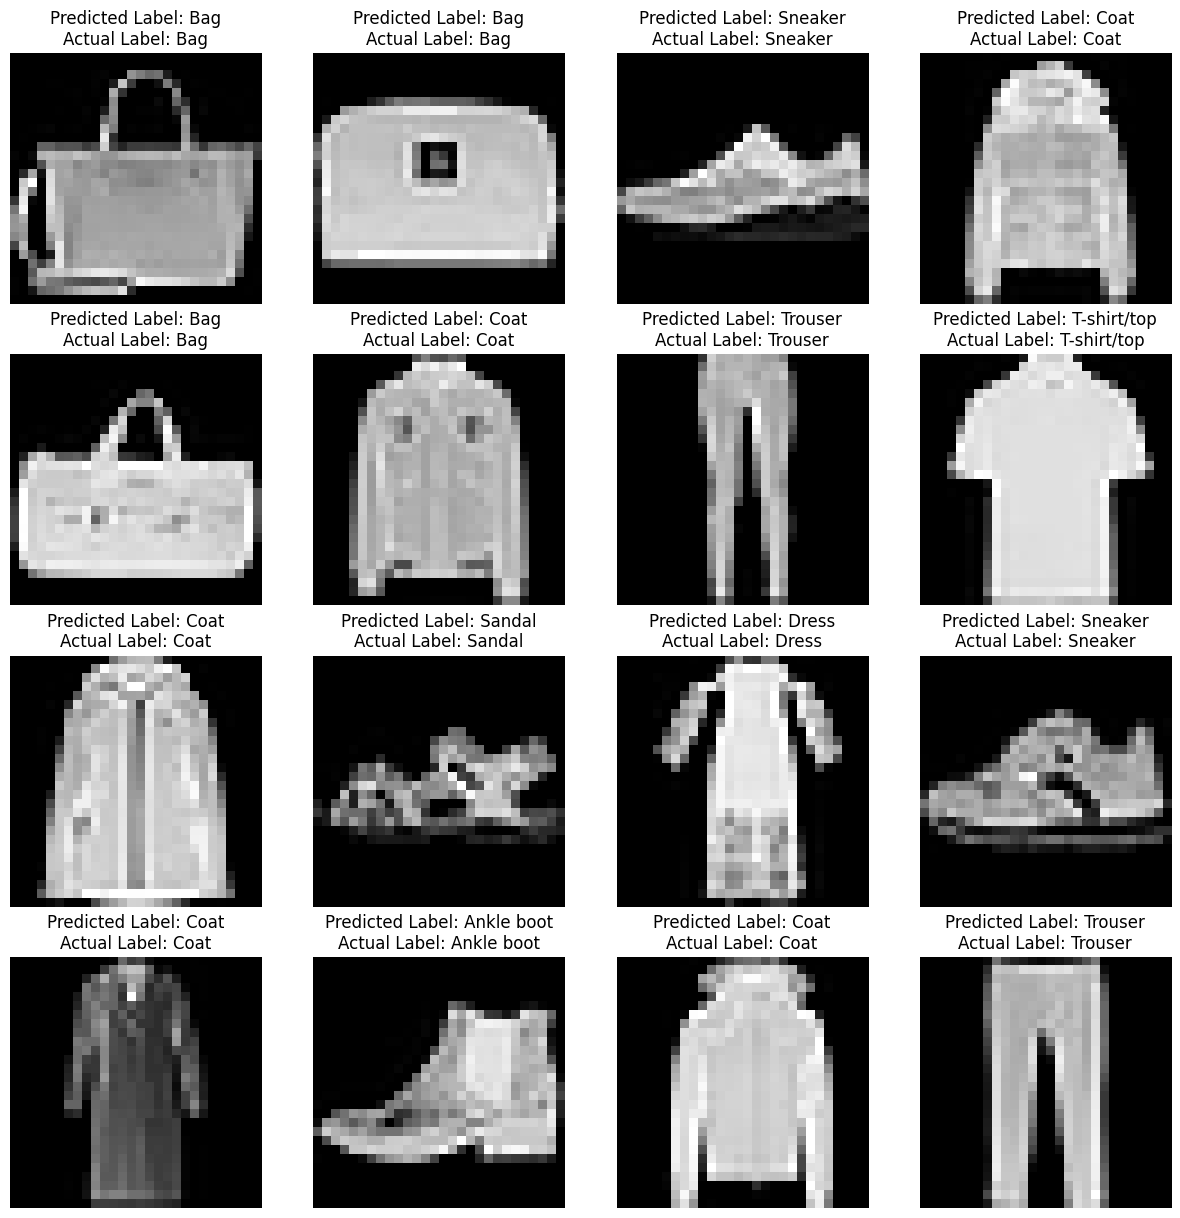

In [17]:
predictions = nn_model.predict(x_test[:16])
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[i] for i in predictions]
test_preview = x_test[:16].reshape(16, 28, 28)
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_preview[i], cmap='gray')
    plt.title(f'Predicted Label: {predictions[i]}\nActual Label: {class_names[y_test[i]]}')
    plt.axis('off')

Text(0.5, 1.0, 'Test accuracy per class')

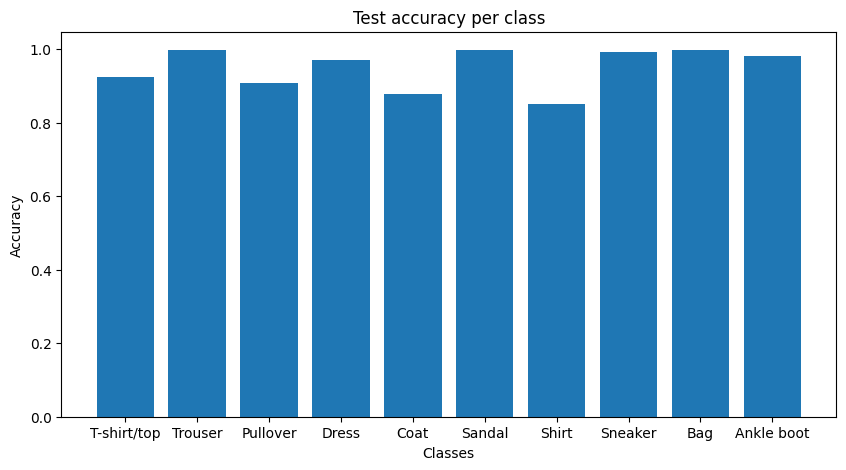

In [18]:
test_predictions = nn_model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)
class_accuracy = [np.mean(test_predictions[y_test == i] == i) for i in range(10)]
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy)
plt.xticks(range(10), class_names)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Test accuracy per class')

## Training the ANN

### Building the Model

Before feeding the data to a CNN model, we need to reshape both the training and test data into 28x28 images.

In [19]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f'Shape of X_train: {x_train.shape}')
print(f'Shape of X_val: {x_val.shape}')
print(f'Shape of X_test: {x_test.shape}')

Shape of X_train: (60000, 28, 28, 1)
Shape of X_val: (48000, 28, 28, 1)
Shape of X_test: (12000, 28, 28, 1)


We will use the following architecture for the CNN model:

1. Convolution layer with ReLu activation (32 filters, kernel size 3x3)
2. Convolution layer with ReLu activation (32 filters, kernel size 3x3)
3. Max Pooling layer (kernel size 2x2)
4. Dropout layer (probability of 0.25)
5. Convolution layer with ReLu activation (64 filters, kernel size 3x3)
6. Convolution layer with ReLu activation (64 filters, kernel size 3x3)
7. Max Pooling layer (kernel size 2x2)
8. Dropout layer (probability of 0.25)
9. Flatten layer
10. Dense layer with ReLu activation (512 neurons)
11. Dropout layer (probability of 0.5)
12. Dense layer with softmax activation (10 neurons)

[Source Paper](https://new.bhu.ac.in/Images/files/51(1).pdf)

In [40]:
# The reason for using channels_last memory format: https://pytorch.org/blog/accelerating-pytorch-vision-models-with-channels-last-on-cpu/
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1), data_format='channels_last'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=2, data_format='channels_last'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', data_format='channels_last'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', data_format='channels_last'),
    tf.keras.layers.MaxPooling2D(pool_size=2, data_format='channels_last'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)        

### Training the Model

In [41]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), batch_size=128)

Epoch 1/50
469/469 [==============================] - 11s 23ms/step - loss: 0.5055 - accuracy: 0.8142 - val_loss: 0.2875 - val_accuracy: 0.8935
Epoch 2/50
469/469 [==============================] - 10s 22ms/step - loss: 0.3051 - accuracy: 0.8885 - val_loss: 0.2257 - val_accuracy: 0.9180
Epoch 3/50
469/469 [==============================] - 11s 23ms/step - loss: 0.2581 - accuracy: 0.9057 - val_loss: 0.2043 - val_accuracy: 0.9242
Epoch 4/50
469/469 [==============================] - 12s 25ms/step - loss: 0.2328 - accuracy: 0.9150 - val_loss: 0.1799 - val_accuracy: 0.9326
Epoch 5/50
469/469 [==============================] - 14s 30ms/step - loss: 0.2127 - accuracy: 0.9204 - val_loss: 0.1656 - val_accuracy: 0.9416
Epoch 6/50
469/469 [==============================] - 16s 33ms/step - loss: 0.1983 - accuracy: 0.9263 - val_loss: 0.1427 - val_accuracy: 0.9467
Epoch 7/50
469/469 [==============================] - 21s 46ms/step - loss: 0.1843 - accuracy: 0.9311 - val_loss: 0.1312 - val_accuracy:

### Evaluating the Model

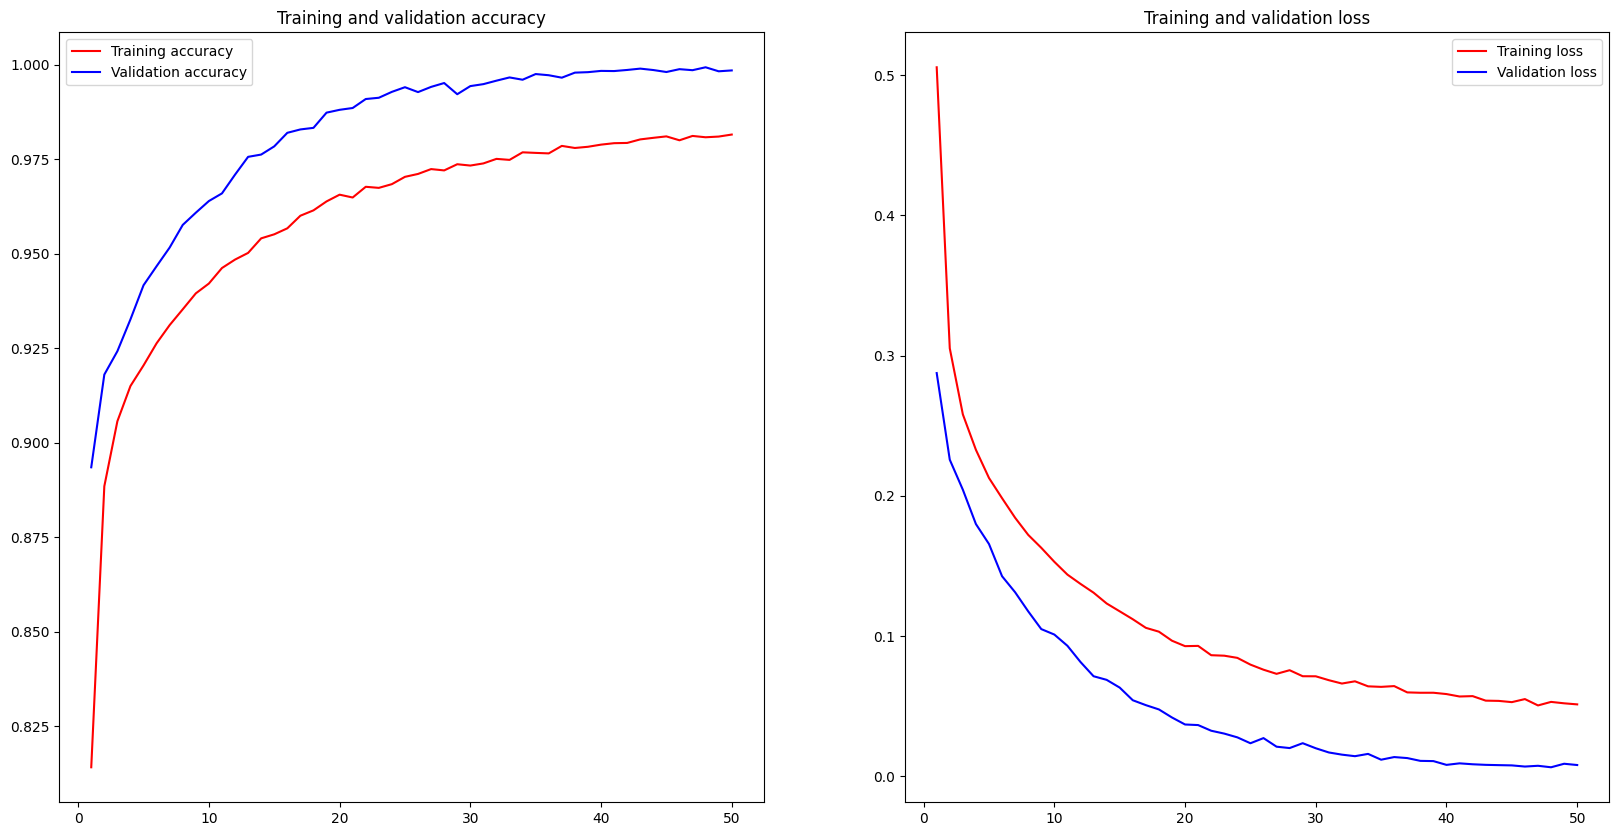

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(epochs, acc, 'r', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()
ax2.plot(epochs, loss, 'r', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

Now let's take a look at how well the model has recognized the classes.

Text(0.5, 1.0, 'Training accuracy per class')

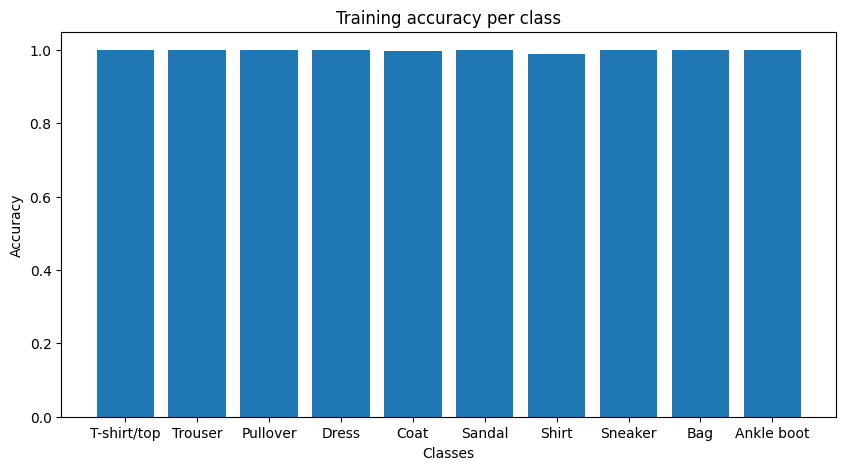

In [43]:
train_predictions = cnn_model.predict(x_train)
train_predictions = np.argmax(train_predictions, axis=1)
class_accuracy = [np.mean(train_predictions[y_train == i] == i) for i in range(10)]
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy)
plt.xticks(range(10), class_names)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Training accuracy per class')

### Testing the Model on Unseen Data

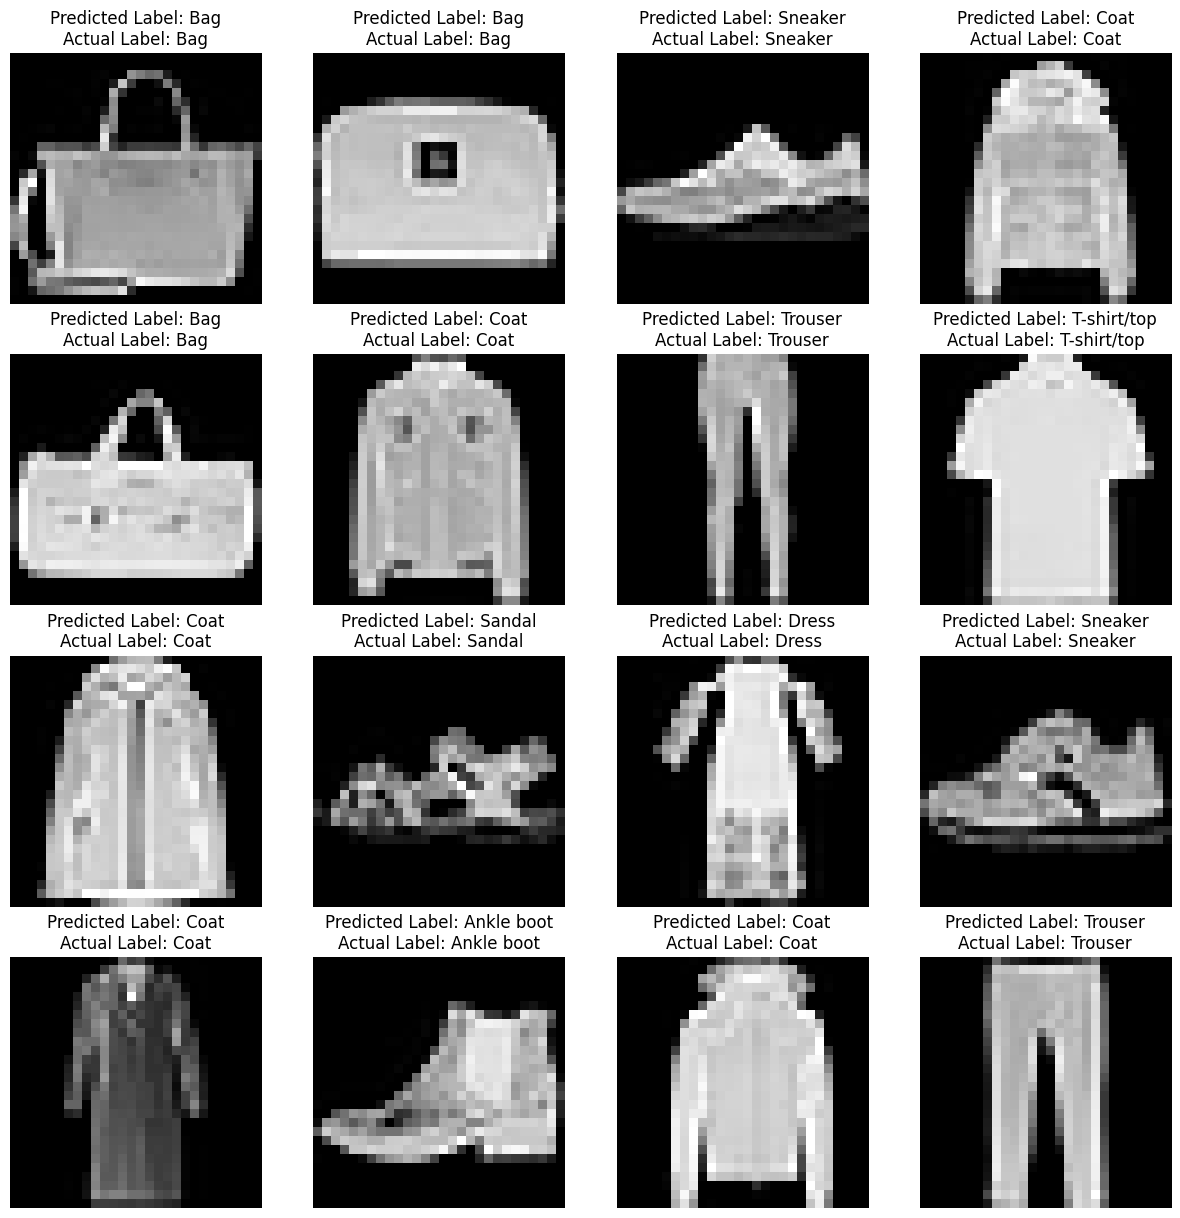

In [44]:
predictions = cnn_model.predict(x_test[:16])
predictions = np.argmax(predictions, axis=1)
predictions = [class_names[i] for i in predictions]
test_preview = x_test[:16].reshape(16, 28, 28)
plt.figure(figsize=(15, 15))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_preview[i], cmap='gray')
    plt.title(f'Predicted Label: {predictions[i]}\nActual Label: {class_names[y_test[i]]}')
    plt.axis('off')

Text(0.5, 1.0, 'Test accuracy per class')

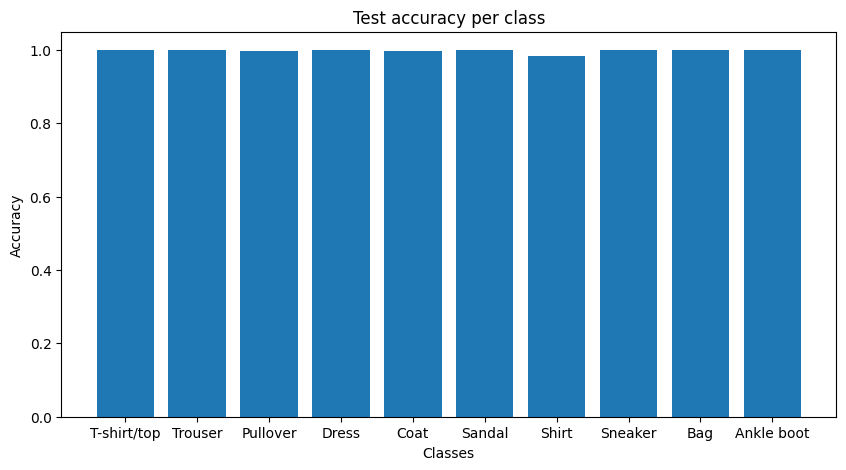

In [45]:
test_predictions = cnn_model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)
class_accuracy = [np.mean(test_predictions[y_test == i] == i) for i in range(10)]
plt.figure(figsize=(10, 5))
plt.bar(range(10), class_accuracy)
plt.xticks(range(10), class_names)
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Test accuracy per class')

### Visualizing the Feature Maps

Since the CNN model has a huge accuracy, it will be a good idea to visualize the feature maps of its layers to see what kinds of features are being captured by what layers. Let's use some random image from the test set to visualize the feature maps corresponding to it.

In [46]:
layer_outputs = [layer.output for layer in cnn_model.layers]
feature_map_model = tf.keras.models.Model(inputs=cnn_model.input, outputs=layer_outputs)
feature_maps = feature_map_model.predict(x_test[69].reshape(1, 28, 28, 1))
layer_names = [layer.name for layer in cnn_model.layers]
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f'The shape of {layer_name} is {feature_map.shape}')

The shape of conv2d_39 is (1, 28, 28, 32)
The shape of conv2d_40 is (1, 28, 28, 32)
The shape of max_pooling2d_18 is (1, 14, 14, 32)
The shape of dropout_28 is (1, 14, 14, 32)
The shape of conv2d_41 is (1, 14, 14, 64)
The shape of conv2d_42 is (1, 14, 14, 64)
The shape of max_pooling2d_19 is (1, 7, 7, 64)
The shape of dropout_29 is (1, 7, 7, 64)
The shape of flatten_9 is (1, 3136)
The shape of dense_25 is (1, 512)
The shape of dropout_30 is (1, 512)
The shape of dense_26 is (1, 10)


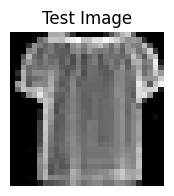

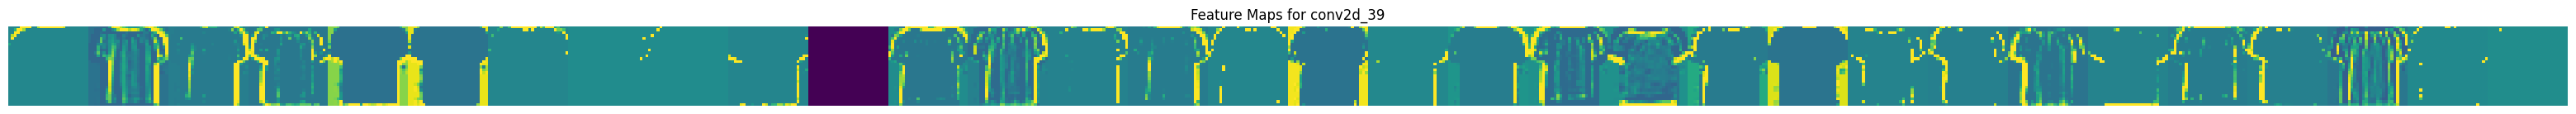

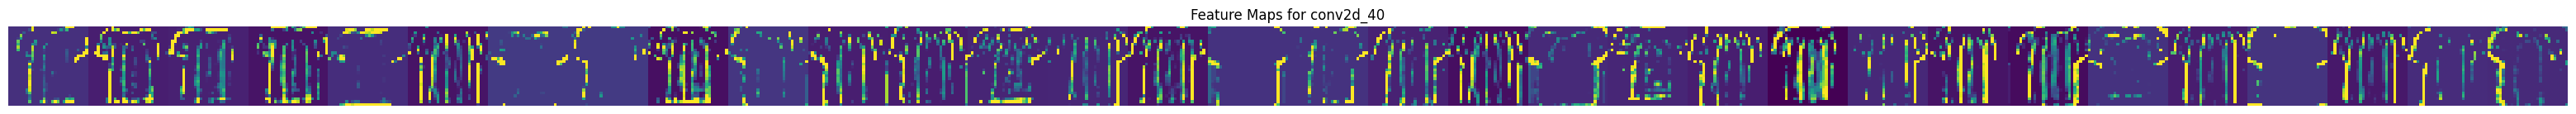

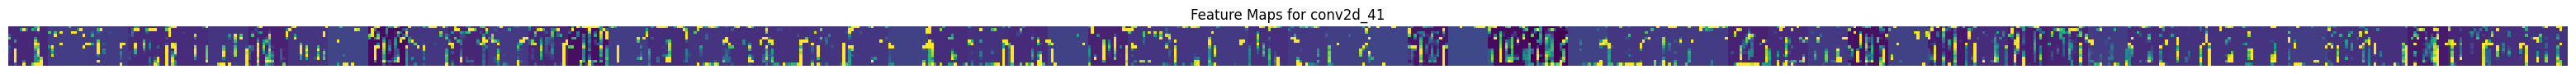

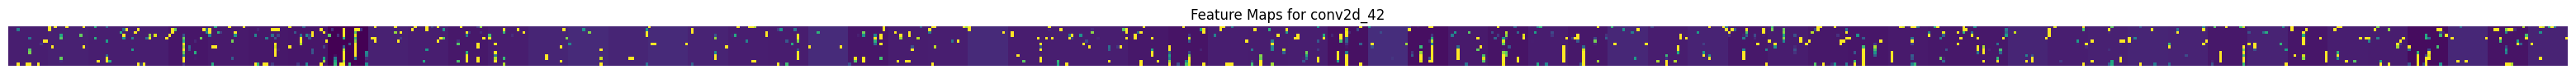

In [48]:
plt.figure(figsize=(2, 2))
plt.imshow(x_test[69].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title('Test Image')

# Inspired by: https://www.analyticsvidhya.com/blog/2020/11/tutorial-how-to-visualize-feature-maps-directly-from-cnn-layers/
for layer_name, feature_map in zip(layer_names, feature_maps):
    # We only need to plot the feature maps of the convolutional layers.
    if layer_name.startswith('conv'):
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        image_belt = np.zeros((size, size * n_features))
        for i in range(n_features):
            feature_image = feature_map[0, :, :, i]
            feature_image -= feature_image.mean()
            feature_image /= feature_image.std()
            feature_image *= 64
            feature_image += 128
            feature_image = np.clip(feature_image, 0, 255).astype('uint8')
            image_belt[:, i * size: (i + 1) * size] = feature_image
        scale = 40. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(f'Feature Maps for {layer_name}')
        plt.grid(False)
        plt.axis('off')
        plt.imshow(image_belt, aspect='auto', cmap='viridis')